# EarlyStopping Callback

## 模型

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## EarlyStopping callbacks

In [2]:
# validation loss 三個執行週期沒改善就停止訓練
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_accuracy'),
]

In [3]:
# 訓練 20 次，但實際只訓練 12次就停止了
history = model.fit(x_train_norm, y_train, epochs=20, validation_split=0.2, 
                    callbacks=my_callbacks)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8657 - loss: 0.4545 - val_accuracy: 0.9632 - val_loss: 0.1329
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9618 - loss: 0.1268 - val_accuracy: 0.9691 - val_loss: 0.1053
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9729 - loss: 0.0911 - val_accuracy: 0.9742 - val_loss: 0.0899
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9786 - loss: 0.0680 - val_accuracy: 0.9751 - val_loss: 0.0854
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0535 - val_accuracy: 0.9754 - val_loss: 0.0848
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9861 - loss: 0.0457 - val_accuracy: 0.9778 - val_loss: 0.0763
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9782 - val_loss: 0.0770
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9886 - loss: 0.0333 - 

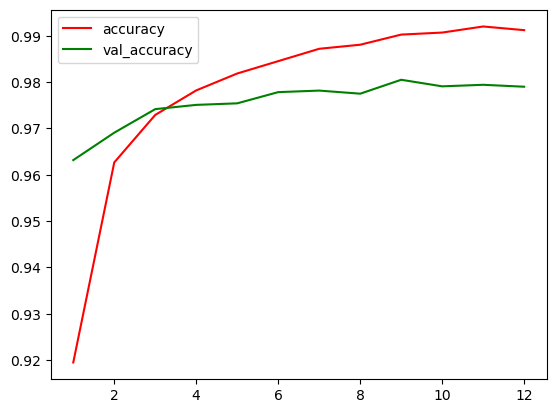

In [4]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1,len(history.history['accuracy'])+1), history.history['accuracy'], 'r', label='accuracy')
plt.plot(np.arange(1,len(history.history['accuracy'])+1), history.history['val_accuracy'], 'g', label='val_accuracy')
plt.legend()

## 改為 val_loss

In [5]:
# validation loss 三個執行週期沒改善就停止訓練
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_loss'),
]

In [6]:
# 訓練 20 次，但實際只訓練 12次就停止了
history = model.fit(x_train_norm, y_train, epochs=20, validation_split=0.2, 
                    callbacks=my_callbacks)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9774 - val_loss: 0.0915
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9942 - loss: 0.0162 - val_accuracy: 0.9797 - val_loss: 0.0907
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9801 - val_loss: 0.0930
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9937 - loss: 0.0179 - val_accuracy: 0.9794 - val_loss: 0.0933
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9936 - loss: 0.0178 - val_accuracy: 0.9804 - val_loss: 0.0996


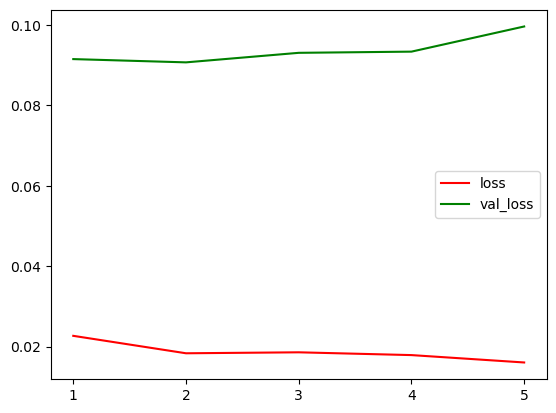

In [8]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], 'r', label='loss')
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['val_loss'], 'g', label='val_loss')
plt.xticks(ticks=np.arange(1,len(history.history['loss'])+1))
plt.legend()

In [25]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.10199097543954849, 0.9833999872207642]